# <font color=blue>Natural Resource Protection & Child Health Indicators</font>
***

## DATA SET
> #### Source: SEDAC https://sedac.ciesin.columbia.edu/data/set/nrmi-natural-resource-protection-child-health-indicators-2019
> #### Release: 2019
> ####  "  The Natural Resource Protection and Child Health Indicators, 2019 Release, is produced in support of the U.S. 
> #### Millennium Challenge Corporation (MCC) as selection criteria for funding eligibility.  "
#### 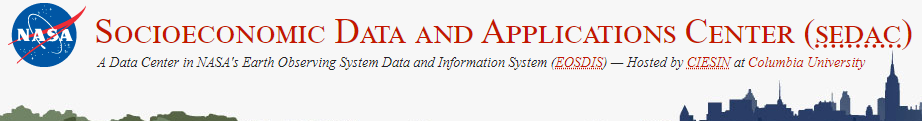


> ## MCC Initiatives 
> Full description of MCC initiatives: https://www.mcc.gov/initiatives
> #### 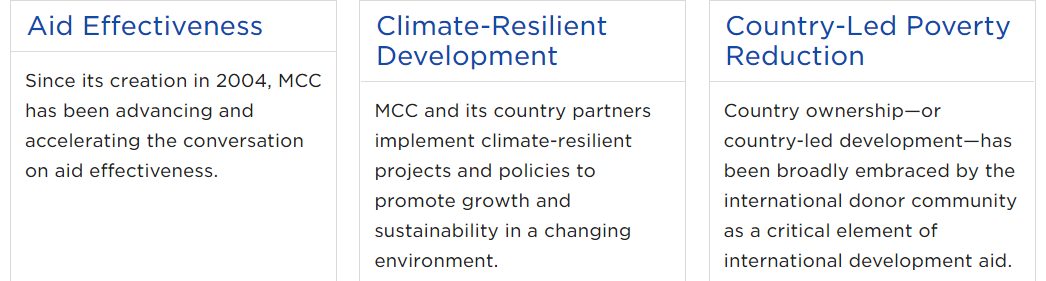

> ## Initiatives Supported by Analysis
> ### Aid Effectiveness 
>> #### By Region & Sub-Region, where do Child Health Indicators have the lowest 3 year mean?
> ### Climate-Resilient Development
>> #### Where can relationships be identified between Natural Resource Protection & Child Health?
> ### Country-Led Poverty Reduction
>> #### Which countries show significant relationships for inferces on future MCC funding?




# DATA PREP
> #### Steps to clean/reshape data

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# bring in Natural Resource Protection Indicator data
# NRPI_v2019_xx
# The Natural Resource Protection Indicator is the proximity to target of 17% protection
# across all biomes on a 0-100 scale (2019 release).
# 100 corresponds to 17% protection across all biomes, and 0 corresponds to zero protection.

resources_df = pd.read_excel('resource_health_indicators.xlsx', sheet_name='NRPI_2019')
resources_df.head(5)

,ISO3,CountryName,NRPI_v2019_15,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,58.964862
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,0.613273
2,AGO,Angola,34.107313,34.107313,34.107313,34.107313,34.107313
3,AIA,Anguilla,3.211881,3.211881,3.211881,3.211881,5.099826
4,ALB,Albania,91.669651,91.669651,91.669651,91.669651,91.669651


In [3]:
# resources_df = pd.read_excel('https://github.com/atxmoon/aly6140_capstone/blob/main/resource_health_indicators.xlsx')
# resources_df.head(2)

In [4]:
# bring in Child Health Indicator data
child_health_df = pd.read_excel('resource_health_indicators.xlsx', sheet_name='CHI_2019')
child_health_df.head(2)

,ISO3,CountryName,cmr_10,cmr_11,cmr_12,cmr_13,cmr_14,cmr_15,cmr_16,cmr_17,...,chmort_pt_18,CHI_v2019_10,CHI_v2019_11,CHI_v2019_12,CHI_v2019_13,CHI_v2019_14,CHI_v2019_15,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18
0,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,25.264712,23.732247,22.256063,20.841731,19.48403,18.218624,17.086026,16.050861,...,78.620829,48.949188,50.954385,52.948497,54.929004,56.898474,58.840417,60.735683,62.603587,63.034354


In [5]:
# data description
# cmr_xx, Deaths of children age 1 to exact age 5 per 1,000 live births in that year (4q1)
# wat_xx, water (raw and proximity to target), 0-100 scale
# san_xx, sanitation (raw and proximity to target), 0-100 scale
# chmort_pt_xx, Probability of dying between age 1 and 5 (4q1) (expressed in chances out of 1,000)
# CHI_v2019_xx, Child Health Indicator, unweighted average of three proximity to target indicators - water, sanitation, and mortality (2019 release)

In [6]:
# keep only series of data for 2016 forward
child_health_df = child_health_df.drop(columns=['cmr_10', 'cmr_11', 'cmr_12', 'cmr_13', 'cmr_14', 'cmr_15', 'wat_10', 'wat_11', 'wat_12', 'wat_13', 'wat_14', 'wat_15', 'san_10', 'san_11', 'san_12', 'san_13', 'san_14', 'san_15', 'chmort_pt_10', 'chmort_pt_11', 'chmort_pt_12', 'chmort_pt_13', 'chmort_pt_14', 'chmort_pt_15', 'CHI_v2019_10', 'CHI_v2019_11', 'CHI_v2019_12', 'CHI_v2019_13', 'CHI_v2019_14', 'CHI_v2019_15'])


In [7]:
# Join Natural Resource & Child Health data on ISO3
df = resources_df.merge(child_health_df, left_on='ISO3', right_on='ISO3')
df = df.drop(columns=['NRPI_v2019_15'])
df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,wat_18,san_16,san_17,san_18,chmort_pt_16,chmort_pt_17,chmort_pt_18,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,97.869023,97.543481,97.543481,97.543481,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,67.064623,42.054183,43.417610,43.417610,75.866382,77.328529,78.620829,60.735683,62.603587,63.034354


In [8]:
# add series for 3 year NRPI mean
col = df.loc[: , "NRPI_v2019_16":"NRPI_v2019_18"]
df['nrpi_mean'] = col.mean(axis=1)
df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,san_16,san_17,san_18,chmort_pt_16,chmort_pt_17,chmort_pt_18,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18,nrpi_mean
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,97.543481,97.543481,97.543481,NaN,NaN,NaN,NaN,NaN,NaN,58.964862
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,42.054183,43.417610,43.417610,75.866382,77.328529,78.620829,60.735683,62.603587,63.034354,0.613273


In [9]:
# add series for 3 year CMR mean, WAT mean, SAN mean, CHMORT mean, CHI mean

col = df.loc[: , "cmr_16":"cmr_18"]
df['cmr_mean'] = col.mean(axis=1)

col = df.loc[: , "wat_16":"wat_18"]
df['wat_mean'] = col.mean(axis=1)

col = df.loc[: , "san_16":"san_18"]
df['san_mean'] = col.mean(axis=1)

col = df.loc[: , "chmort_pt_16":"chmort_pt_18"]
df['chmort_pt_mean'] = col.mean(axis=1)

col = df.loc[: , "CHI_v2019_16":"CHI_v2019_18"]
df['CHI_mean'] = col.mean(axis=1)

df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,chmort_pt_18,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18,nrpi_mean,cmr_mean,wat_mean,san_mean,chmort_pt_mean,CHI_mean
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.964862,NaN,97.869023,97.543481,NaN,NaN
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,78.620829,60.735683,62.603587,63.034354,0.613273,16.090943,66.138577,42.963134,77.271913,62.124541


In [10]:
# bring in dataset that adds regional/geographic grouping by ISO3
temp_df = pd.read_csv('https://datahub.io/core/country-codes/r/country-codes.csv')
temp_df.head(2)

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925,TW,NaN,TW,...,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1,AF,AF,AF,...,Southern Asia,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2


In [11]:
# keep only series for regional/geographic grouping
temp_df = temp_df[['ISO3166-1-Alpha-3', 'Region Name', 'Sub-region Name']]
temp_df.tail(5)

,ISO3166-1-Alpha-3,Region Name,Sub-region Name
245,ESH,Africa,Northern Africa
246,YEM,Asia,Western Asia
247,ZMB,Africa,Sub-Saharan Africa
248,ZWE,Africa,Sub-Saharan Africa
249,ALA,Europe,Northern Europe


In [12]:
# Join Natural Resource & Child Health data with Country/Regional Grouping on ISO3
df = df.merge(temp_df, left_on='ISO3', right_on='ISO3166-1-Alpha-3')
df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,CHI_v2019_18,nrpi_mean,cmr_mean,wat_mean,san_mean,chmort_pt_mean,CHI_mean,ISO3166-1-Alpha-3,Region Name,Sub-region Name
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,NaN,58.964862,NaN,97.869023,97.543481,NaN,NaN,ABW,Americas,Latin America and the Caribbean
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,63.034354,0.613273,16.090943,66.138577,42.963134,77.271913,62.124541,AFG,Asia,Southern Asia


In [13]:
df = df.drop(columns=['CountryName_y', 'ISO3166-1-Alpha-3'])

In [14]:
# come back to this
# df.rename(columns={"CountryName_x": "Country", "NRPI_v2019_15": "NRPI_2015", ""})



# DATA VISUALIZATION

### " The Natural Resource Protection Indicator (NRPI) and Child Health Indicator (CHI) are based on proximity-to-target scores ranging from 0 to 100 (at target). The NRPI covers 234 countries and is calculated based on the weighted average percentage of biomes under protected status. The CHI is a composite index for 195 countries derived from the average of three proximity-to-target scores for access to at least basic water and sanitation, along with child mortality. 
### The 2019 release includes a consistent time series of NRPI scores for 2015 to 2019 and CHI scores for 2010 to 2018. "

## Descriptive Analytics

> ### By Region, where are the lowest Child Health Indicators over preceding 3 years?

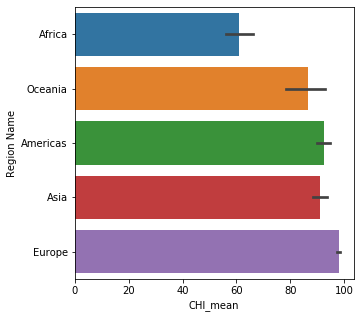

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x="CHI_mean", y="Region Name", data=df.sort_values("CHI_mean"))

> ### By Sub-Region, where are the lowest Child Health Indicators over preceding 3 years?

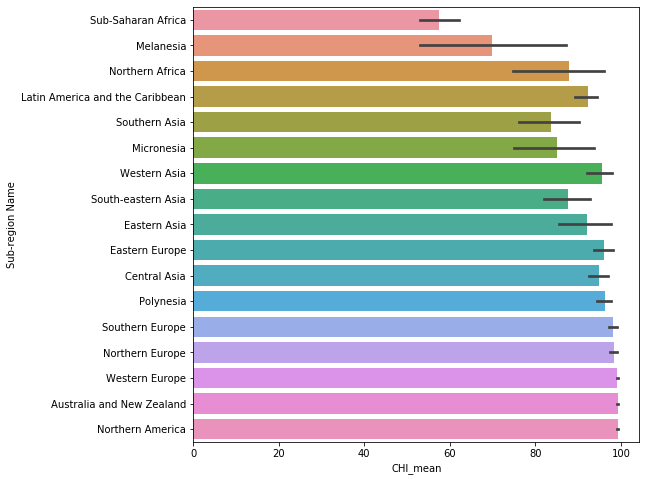

In [16]:
plt.figure(figsize=(8,8))
sns.barplot(x="CHI_mean", y="Sub-region Name", data=df.sort_values("CHI_mean"))

> ### Which Sub-Region Child Health indicators are skewed by outlying countries?

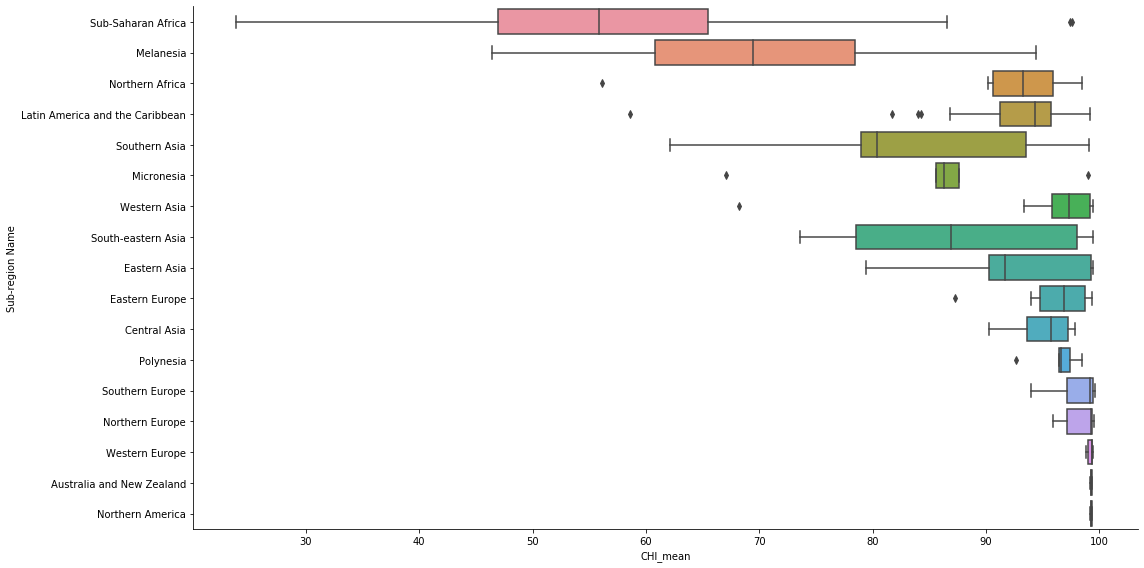

In [17]:
sns.catplot(data=df.sort_values("CHI_mean"), orient="h", kind="box", x="CHI_mean", y="Sub-region Name", height=8, aspect=2)

> ## Where can multivariate relationships be identified? 
>> ### Full Data ,  2018 Child Health & 2018 Natural Resource Protection 

<Figure size 720x720 with 0 Axes>

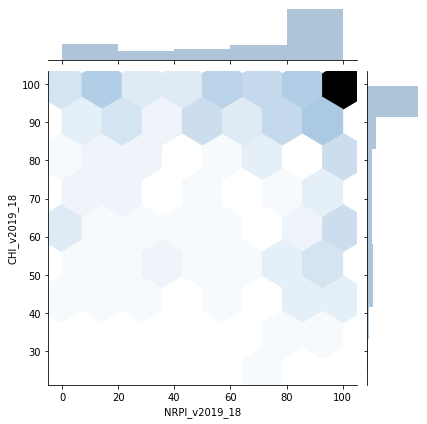

In [18]:
# jointplot with all data
plt.figure(figsize=(10, 10))
sns.jointplot(x="NRPI_v2019_18", y="CHI_v2019_18", kind="hex", color="#356ea0", data=df)

<Figure size 720x720 with 0 Axes>

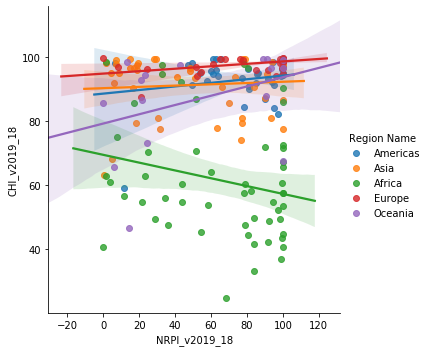

In [19]:
# Full Data, 2018 Child Health & 2018 Natural Resource Protection 
# By Region
plt.figure(figsize=(10, 10))
sns.lmplot(x="NRPI_v2019_18", y="CHI_v2019_18", hue="Region Name", data=df)

> ## Where can multivariate relationships be identified? 
>> ### Subset of Low CHI Sub-Regions:  
>> ### Sub-Saharan Africa, Melanesia, Northern Africa, LATAM, Southern Asia, Micronesia 
>> #### (keeps 6 of 17, 55% of full data set)   
>> ### 2018 Child Health & 2018 Natural Resource Protection

In [21]:
# create subset_df with sub regions of focus
subset = ['Sub-Saharan Africa', 'Melanesia', 'Northern Africa', 'Latin America and the Caribbean', 'Southern Asia', 'Micronesia']
subset_df = df.loc[df['Sub-region Name'].isin(subset)]

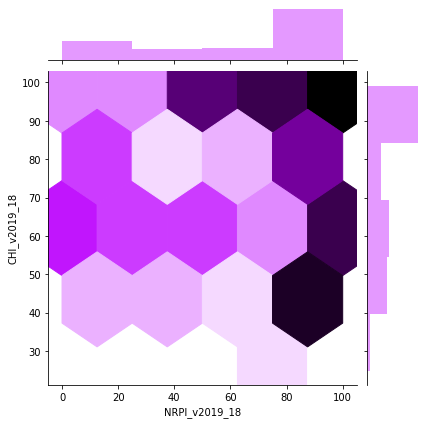

In [22]:
# jointplot with subset data
sns.jointplot(x="NRPI_v2019_18", y="CHI_v2019_18", kind="hex", color="#bd00ff", data=subset_df)

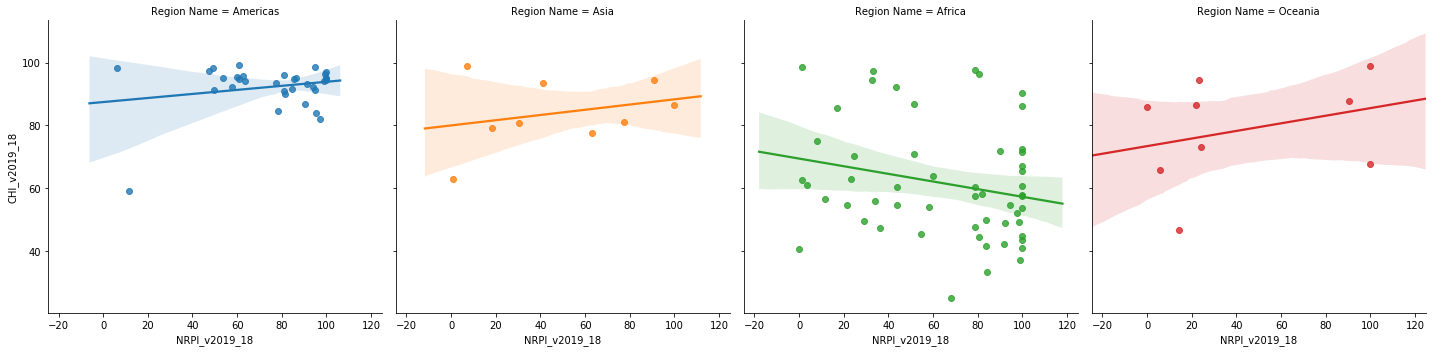

In [23]:
# Subset Data, 2018 Child Health & 2018 Natural Resource Protection 
# By Region
sns.lmplot(x="NRPI_v2019_18", y="CHI_v2019_18", hue="Region Name", col="Region Name", data=subset_df)

> ### Within subset, which countries had the lowest CHI in 2018? (most recent year in CHI data)

In [24]:
country_subset_df = subset_df.sort_values(by='CHI_v2019_18',ascending=False).head(25)

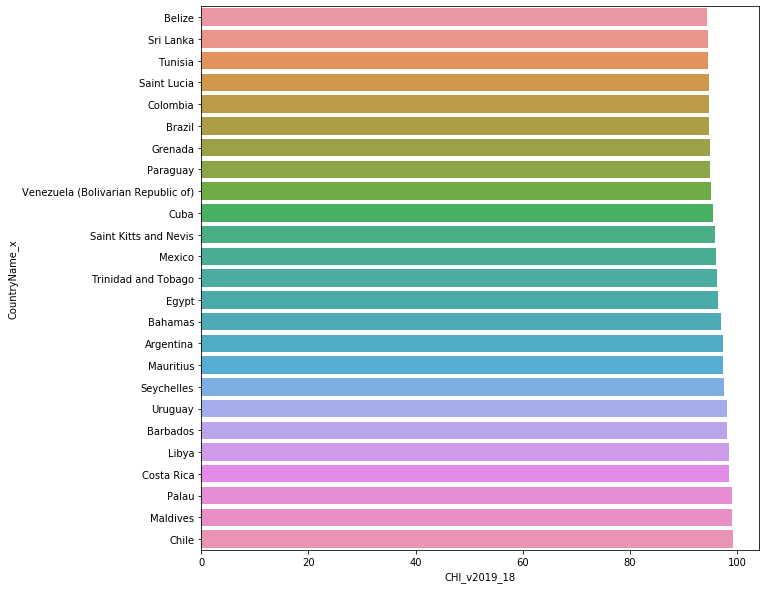

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(x="CHI_v2019_18", y="CountryName_x", data=country_subset_df.sort_values("CHI_v2019_18"))

### Within the 25 countries with lowest 2018 Child Health Indicators, are there significant trends in other dimensions of 2018 data? (Natural Resource Protection Indicator, water, sanitation)

In [27]:
info = country_subset_df.drop(columns=['NRPI_v2019_16', 'NRPI_v2019_17', 'cmr_16', 'cmr_17', 'wat_16', 'wat_17', 'san_16', 'san_17', 'chmort_pt_16', 'chmort_pt_17', 'CHI_v2019_16', 'CHI_v2019_17', 'Region Name', 'Sub-region Name', 'nrpi_mean', 'cmr_mean', 'wat_mean', 'san_mean', 'chmort_pt_mean', 'CHI_mean']) 
info.describe()

,NRPI_v2019_18,NRPI_v2019_19,cmr_18,wat_18,san_18,chmort_pt_18,CHI_v2019_18
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,66.824366,66.885109,1.776791,97.932438,94.125143,97.490323,96.515968
std,31.650336,31.632869,0.644345,2.263474,3.870913,0.910122,1.669120
min,1.237348,1.237348,0.907244,89.416292,87.858524,95.507730,94.420907
25%,49.150264,49.150264,1.249079,97.300110,91.183056,97.169696,95.002281
50%,78.616782,78.616782,1.766635,98.528947,94.193022,97.504669,96.262002
75%,94.704741,94.704741,2.003788,99.500000,97.279378,98.235705,98.161597
max,100.000000,100.000000,3.180420,99.500000,99.500000,98.718539,99.173310


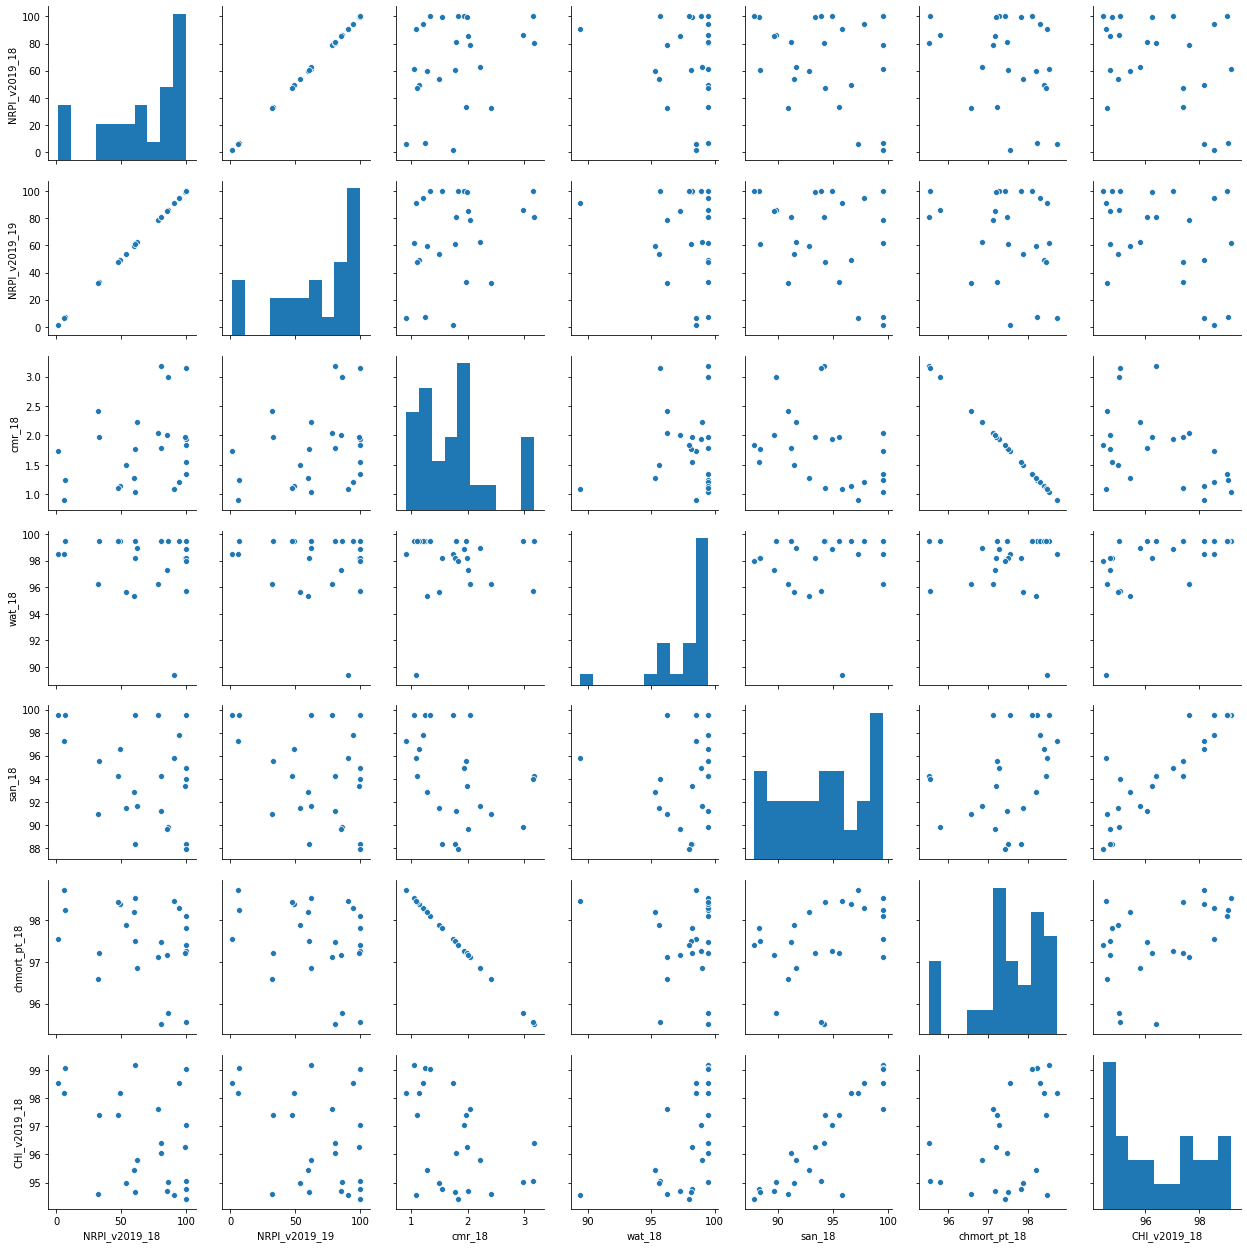

In [28]:
sns.pairplot(info)

## Descriptive Summary
1. Child Health Index mean over preceding 3 years was observed globally to identify a subset of 6 out 17 Sub-Regions.
2. 

# Predictive Analytics

> ## Based on subset of 25 countries, can we predict 2019 CHI as a function of 2019 NRPI?
$$
CHI = \beta * NRPI + \mu
$$

## Predictive Summary

> ## What data could be pulled in to perform deeper country specific analysis/impact of mining other economic resources, etc.

# CITATIONS
## Natural Resource & Child Health Indicators
> ##  Center for International Earth Science Information Network (CIESIN), Columbia University. 2019. Natural Resource Protection and Child Health Indicators, 2019 Release. Palisades, NY: NASA Socioeconomic Data and Applications Center. https://doi.org/10.7927/r6mv-sv82. Accessed 16 OCT 2020.

## Regional Country Grouping Data
> ## Datahub. 2020. Comprehensive Country Codes, https://datahub.io/core/country-codes. Accessed 16 OCT 2020.